In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline

In [2]:
# making 3D_example.csv
from sklearn.datasets import make_blobs 

In [3]:
data,labels = make_blobs(n_samples=60, n_features=2, centers=2, random_state=2)
np.savetxt("2D_example.csv",np.hstack((labels.reshape(60,1), data)), fmt="%d,%f,%f")

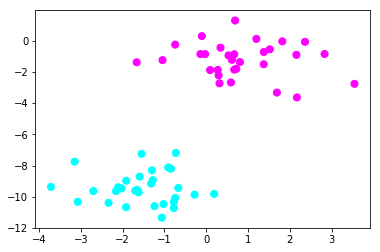

In [30]:
plt.set_cmap(plt.cm.cool) # 色設定
plt.scatter(data[:,0],data[:,1], c=labels, s=50)

In [20]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [40]:
# モジュールの準備
from sklearn import neighbors

# Nearest Neighbor K-近傍法、 K=1
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

# 学習　（識別面の作成）
clf.fit(data,labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

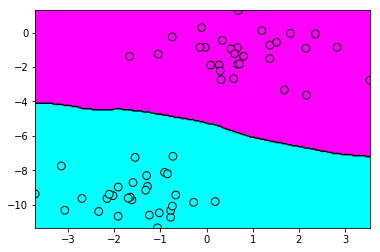

In [39]:
plotBoundary(data,clf)
plt.scatter(data[:,0],data[:,1], c=labels, s=60, marker='o',edgecolors="black")

# Linear model （線形識別）

In [44]:
from sklearn import linear_model
# Nearest Neighbor K-近傍法、 K=1
clf = linear_model.LogisticRegression()

In [45]:
# 学習　（識別面の作成）
clf.fit(data,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

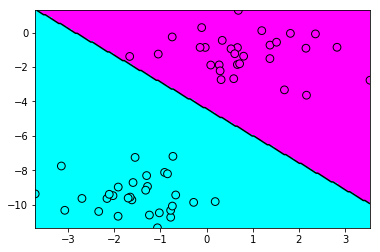

In [46]:
plotBoundary(data,clf)
plt.scatter(data[:,0],data[:,1], c=labels, s=60, marker='o',edgecolors="black")

# Support Vector Classifier

In [48]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(data,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

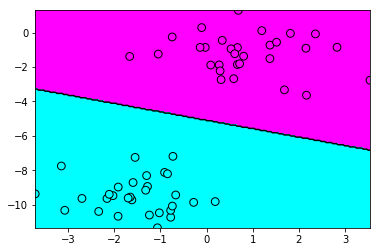

In [49]:
plotBoundary(data,clf)
plt.scatter(data[:,0],data[:,1], c=labels, s=60, marker='o',edgecolors="black")

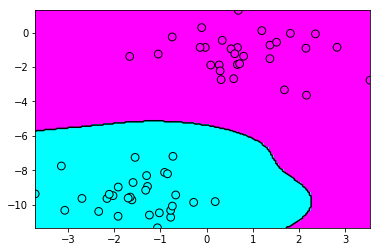

In [50]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(data,labels)
plotBoundary(data,clf)
plt.scatter(data[:,0],data[:,1], c=labels, s=60, marker='o',edgecolors="black")